Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox.I Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 72
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas_profiling
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('videogame_new.csv')
print(df.shape)
df.head()

(11465, 10)


,Unnamed: 0,Name,Global_Sales_x,Rank,Genre,Platform,Publisher,Developer,Critic_Score_y,Year
0,0,Wii Sports,82.53,1.0,Sports,Wii,Nintendo,Nintendo EAD,7.7,2006.0
1,1,Super Mario Bros.,40.24,2.0,Platform,NES,Nintendo,Nintendo EAD,10.0,1985.0
2,2,Super Mario Bros.,40.24,46906.0,Platform,VC,Nintendo,Nintendo EAD,9.0,2006.0
3,5,Mario Kart Wii,35.52,3.0,Racing,Wii,Nintendo,Nintendo EAD,8.2,2008.0
4,6,Wii Sports Resort,32.77,5.0,Sports,Wii,Nintendo,Nintendo EAD,8.0,2009.0


In [3]:
df = df.drop(columns='Unnamed: 0')
df.head()

,Name,Global_Sales_x,Rank,Genre,Platform,Publisher,Developer,Critic_Score_y,Year
0,Wii Sports,82.53,1.0,Sports,Wii,Nintendo,Nintendo EAD,7.7,2006.0
1,Super Mario Bros.,40.24,2.0,Platform,NES,Nintendo,Nintendo EAD,10.0,1985.0
2,Super Mario Bros.,40.24,46906.0,Platform,VC,Nintendo,Nintendo EAD,9.0,2006.0
3,Mario Kart Wii,35.52,3.0,Racing,Wii,Nintendo,Nintendo EAD,8.2,2008.0
4,Wii Sports Resort,32.77,5.0,Sports,Wii,Nintendo,Nintendo EAD,8.0,2009.0


In [5]:
features = ['Rank', 'Genre', 'Platform', 'Publisher', 'Developer', 'Critic_Score_y', 'Year']
df.profile_report()

In [7]:
Over_5m_sales = []
for x in df['Global_Sales_x']:
    if x > 5:
        Over_5m_sales.append(1)
    else:
        Over_5m_sales.append(0)

In [8]:
df['Over_5m_sales'] = Over_5m_sales
df.head()

,Name,Global_Sales_x,Rank,Genre,Platform,Publisher,Developer,Critic_Score_y,Year,Over_5m_sales
0,Wii Sports,82.53,1.0,Sports,Wii,Nintendo,Nintendo EAD,7.7,2006.0,1
1,Super Mario Bros.,40.24,2.0,Platform,NES,Nintendo,Nintendo EAD,10.0,1985.0,1
2,Super Mario Bros.,40.24,46906.0,Platform,VC,Nintendo,Nintendo EAD,9.0,2006.0,1
3,Mario Kart Wii,35.52,3.0,Racing,Wii,Nintendo,Nintendo EAD,8.2,2008.0,1
4,Wii Sports Resort,32.77,5.0,Sports,Wii,Nintendo,Nintendo EAD,8.0,2009.0,1


In [9]:
train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=200)
print(train.shape)
print(test.shape)

(9172, 10)
(2293, 10)


In [10]:
train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=200)
print(train.shape)
print(val.shape)
print(test.shape)

(7337, 10)
(1835, 10)
(2293, 10)


In [11]:
target = 'Over_5m_sales'

X_train = train.drop(columns=target).drop(columns='Global_Sales_x')
y_train = train[target]
X_val = val.drop(columns=target).drop(columns='Global_Sales_x')
y_val = val[target]
X_test = test.drop(columns=target).drop(columns='Global_Sales_x')

In [12]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=250, n_jobs=-1, random_state=200)
)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Name', 'Genre', 'Platform', 'Publisher',
                                      'Developer'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Name',
                                          'data_type': dtype('O'),
                                          'mapping': Legend of Kay                    1
The Sims 2                       2
BlazBlue: Calamity Trigger       3
Madden NFL 07                    4
Madden NFL 2004                  5
                              ... 
Battalion Wars 2              2439
Panzer Dragoon Sag...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                 

In [13]:
pipeline.score(X_val, y_val)

0.9651226158038148

In [15]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    XGBClassifier(random_state=200, n_jobs=-1)
)

param_distributions = {
#     'simpleimputer__strategy':['mean', 'median'],
    'xgbclassifier__n_estimators': randint(20, 500),
    'xgbclassifier__booster': ('gbtree', 'gblinear', 'dart'),
    'xgbclassifier__max_depth': (5, 10, 15, 20, None),
    'xgbclassifier__learning_rate': (0.1, 0.2, 0.3, 0.4, 0.5),
    'xgbclassifier__max_depth': (1, 2, 3, 4, 5)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    cv=10,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
#     n_jobs=-1
)

search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.969, test=0.967), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.968, test=0.969), total=   0.4s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.968, test=0.969), total=   0.4s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s remaining:    0.0s


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.968, test=0.969), total=   0.3s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.9s remaining:    0.0s


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.969, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.969, test=0.969), total=   0.4s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.5s remaining:    0.0s


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.969, test=0.969), total=   0.3s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.8s remaining:    0.0s


[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=347, score=(train=0.969, test=0.969), total=   0.4s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=292 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=292, score=(train=0.969, test=0.967), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=292 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=292, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=292 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=296, score=(train=0.984, test=0.971), total=   2.5s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=296 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=296, score=(train=0.984, test=0.965), total=   2.1s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=296 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=296, score=(train=0.983, test=0.971), total=   2.1s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=296 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=390, score=(train=0.976, test=0.971), total=   0.4s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=390 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=390, score=(train=0.977, test=0.969), total=   0.4s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=390 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=390, score=(train=0.975, test=0.975), total=   0.8s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=390 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.1,

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=210, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=210 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=210, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=210 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=210, score=(train=0.968, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=210 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=453, score=(train=0.986, test=0.965), total=   6.9s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=453 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=453, score=(train=0.985, test=0.973), total=   7.3s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=319 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=319, score=(train=0.969, test=0.967), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=319 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=257, score=(train=0.969, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=257 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=257, score=(train=0.969, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=257 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=257, score=(train=0.969, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=257 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=344, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=344 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=344, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=344 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=344, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=344 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=314, score=(train=0.986, test=0.958), total=   0.8s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=314 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=314, score=(train=0.986, test=0.967), total=   0.6s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=314 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=314, score=(train=0.984, test=0.975), total=   0.5s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=314 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5,

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=401, score=(train=0.986, test=0.965), total=  12.2s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=401 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=401, score=(train=0.986, test=0.963), total=  12.2s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=401 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=401, score=(train=0.985, test=0.970), total=  12.2s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=47 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier_

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=352, score=(train=0.985, test=0.962), total=   7.7s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=352 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=352, score=(train=0.985, test=0.970), total=   8.0s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=352 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=352, score=(train=0.985, test=0.970), total=   7.3s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=352 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.5, xgbclassifier

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=367, score=(train=0.986, test=0.967), total=  10.1s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=367 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=367, score=(train=0.984, test=0.977), total=   9.6s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=367 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=367, score=(train=0.985, test=0.971), total=  10.9s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=367 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.2, xgbclassifier

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=33, score=(train=0.976, test=0.975), total=   0.2s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=33 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=33, score=(train=0.975, test=0.971), total=   0.1s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=76 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=76, score=(train=0.981, test=0.966), total=   0.4s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=76 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=371, score=(train=0.968, test=0.969), total=   0.3s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=371 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=371, score=(train=0.969, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=371 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=371, score=(train=0.969, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=371 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=301, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=301 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=301, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=301 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=301, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=301 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=475, score=(train=0.977, test=0.971), total=   0.4s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=206 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=206, score=(train=0.985, test=0.956), total=   2.8s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=206 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=206, score=(train=0.985, test=0.967), total=   3.9s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=206 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifi

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=350, score=(train=0.985, test=0.971), total=   0.6s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=350 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=350, score=(train=0.986, test=0.963), total=   0.8s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=350 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=350, score=(train=0.986, test=0.963), total=   0.7s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=350 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2,

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=241, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=241 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=241, score=(train=0.968, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=241 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=241, score=(train=0.968, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=241 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=359, score=(train=0.986, test=0.958), total=   6.5s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=359 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=359, score=(train=0.986, test=0.969), total=   7.0s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=359 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=359, score=(train=0.984, test=0.978), total=   6.6s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=359 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=404, score=(train=0.980, test=0.970), total=   3.8s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=404 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=404, score=(train=0.981, test=0.971), total=   4.2s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=404 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=404, score=(train=0.980, test=0.975), total=   4.0s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=390 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.4, xgbclassi

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=436, score=(train=0.985, test=0.963), total=   2.6s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=436 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=436, score=(train=0.985, test=0.969), total=   1.8s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=436 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=436, score=(train=0.985, test=0.969), total=   1.7s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=436 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.3,

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=495, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=495 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=495, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=495 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=495, score=(train=0.968, test=0.969), total=   0.5s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=495 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=498, score=(train=0.983, test=0.969), total=   0.8s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=498 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=498, score=(train=0.983, test=0.974), total=   0.8s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=413 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=413, score=(train=0.969, test=0.967), total=   0.5s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=413 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_r

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=75, score=(train=0.977, test=0.974), total=   0.2s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=75 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=75, score=(train=0.978, test=0.971), total=   0.2s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=75 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=75, score=(train=0.976, test=0.970), total=   0.2s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=75 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.1, xgbclassifier__max_

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=156, score=(train=0.968, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=156 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=156, score=(train=0.968, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=156 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=156, score=(train=0.968, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=156 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=405, score=(train=0.986, test=0.958), total=   0.9s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=405 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=405, score=(train=0.986, test=0.967), total=   0.9s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=405 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=405, score=(train=0.984, test=0.977), total=   1.1s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=405 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5,

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=156, score=(train=0.969, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=156 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=156, score=(train=0.969, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=156 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=156, score=(train=0.969, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=246 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rat

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=379, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=379 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=379, score=(train=0.968, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=379 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=379, score=(train=0.969, test=0.969), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=379 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=89, score=(train=0.981, test=0.970), total=   0.4s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=89 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=89, score=(train=0.981, test=0.977), total=   0.3s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=89 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=89, score=(train=0.982, test=0.973), total=   0.3s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=89 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.5, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=22, score=(train=0.977, test=0.974), total=   0.1s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=468 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=468, score=(train=0.986, test=0.962), total=  13.6s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=468 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=468, score=(train=0.986, test=0.969), total=  13.8s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=468 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifie

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=283, score=(train=0.985, test=0.970), total=   0.7s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=283 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=283, score=(train=0.986, test=0.962), total=   0.6s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=283 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=283, score=(train=0.986, test=0.965), total=   0.6s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=283 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2,

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=188, score=(train=0.985, test=0.973), total=   0.5s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=188 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=188, score=(train=0.985, test=0.962), total=   0.5s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=188 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=188, score=(train=0.985, test=0.969), total=   0.5s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=188 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.2,

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=75, score=(train=0.968, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=75 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=75, score=(train=0.968, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=75 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=75, score=(train=0.968, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=4, xgbclassifier__n_estimators=75 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_r

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=24, score=(train=0.969, test=0.969), total=   0.1s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=409 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=409, score=(train=0.986, test=0.956), total=   9.7s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=409 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=409, score=(train=0.986, test=0.966), total=   9.9s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassifier__max_depth=5, xgbclassifier__n_estimators=409 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.3, xgbclassif

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=472, score=(train=0.978, test=0.970), total=   3.1s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=472 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=472, score=(train=0.977, test=0.969), total=   3.3s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=472 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=472, score=(train=0.978, test=0.974), total=   4.1s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=1, xgbclassifier__n_estimators=472 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier

[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=255, score=(train=0.985, test=0.967), total=   2.5s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=255 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=255, score=(train=0.985, test=0.966), total=   2.5s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=255 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=255, score=(train=0.985, test=0.967), total=   2.8s
[CV] xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=255 
[CV]  xgbclassifier__booster=dart, xgbclassifier__learning_rate=0.4, xgbclassifier

[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=496, score=(train=0.969, test=0.967), total=   0.3s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=496 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=496, score=(train=0.968, test=0.969), total=   0.3s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=496 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=496, score=(train=0.968, test=0.969), total=   0.3s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=496 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__lear

[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=47, score=(train=0.981, test=0.970), total=   0.1s
[CV] xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=47 
[CV]  xgbclassifier__booster=gbtree, xgbclassifier__learning_rate=0.4, xgbclassifier__max_depth=3, xgbclassifier__n_estimators=47, score=(train=0.980, test=0.970), total=   0.1s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=159 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=159, score=(train=0.969, test=0.967), total=   0.2s
[CV] xgbclassifier__booster=gblinear, xgbclassifier__learning_rate=0.2, xgbclassifier__max_depth=2, xgbclassifier__n_estimators=159 
[CV]  xgbclassifier__booster=gblinear, xgbclassifier__learning_rate

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 24.9min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             w

In [16]:
pipeline = search.best_estimator_
pipeline.score(X_val, y_val)

0.9689373297002725

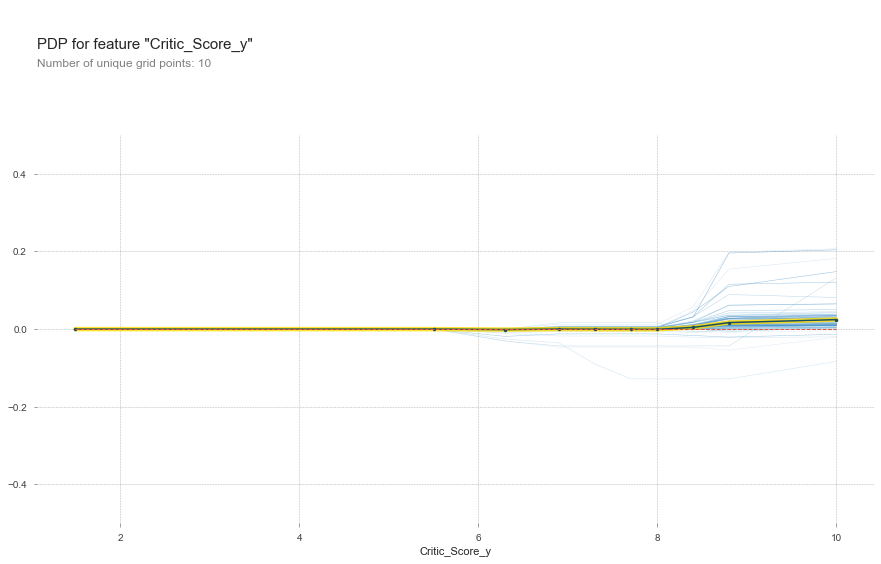

In [21]:
feature = 'Critic_Score_y'

isolated = pdp_isolate(
    model = pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.ylim(-0.5, 0.5);